<a href="https://colab.research.google.com/github/kai-v/ImageEnhancement/blob/main/ImageEnhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

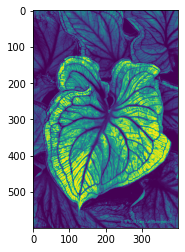

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mp
import PIL as pl
import cv2

image_path = "/media/test.jpg"
f1 = mp.imread(image_path)
%matplotlib inline
plt.imshow(f1)
# 2. 
#f2.show()
rows,cols = f1.shape